In [2]:


# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.transportation.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.transportation.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("tfrh-tu9e", limit=10000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)


In [3]:
results_df.to_csv('flight_data.csv', index=False)

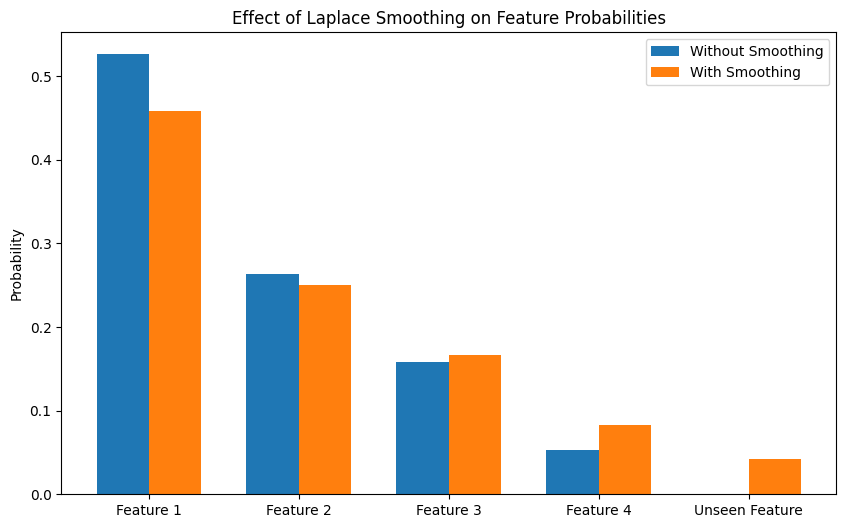

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Unseen Feature']
counts_no_smoothing = [10, 5, 3, 1, 0]
counts_with_smoothing = [11, 6, 4, 2, 1]

# Calculate probabilities
total_no_smooth = sum(counts_no_smoothing)
total_smooth = sum(counts_with_smoothing)
probs_no_smoothing = [count/total_no_smooth if count > 0 else 0 for count in counts_no_smoothing]
probs_with_smoothing = [count/total_smooth for count in counts_with_smoothing]

# Create the visualization
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = np.arange(len(features))

ax.bar(x - width/2, probs_no_smoothing, width, label='Without Smoothing')
ax.bar(x + width/2, probs_with_smoothing, width, label='With Smoothing')

ax.set_ylabel('Probability')
ax.set_title('Effect of Laplace Smoothing on Feature Probabilities')
ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()

plt.savefig('static/img/smoothing_effect.png', dpi=300, bbox_inches='tight')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle, FancyArrowPatch
from matplotlib.colors import ListedColormap
import pandas as pd

# Set style for all plots
sns.set_context("talk")

# 1. BERNOULLI MODEL VISUALIZATION
def create_bernoulli_model_image():
    """Create a visualization of Bernoulli distribution and its application in Naive Bayes"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # First subplot: Bernoulli PMF
    x = np.array([0, 1])
    p = 0.7  # probability parameter
    pmf = np.array([1-p, p])
    
    ax1.bar(x, pmf, width=0.4, alpha=0.7, color=['skyblue', 'navy'])
    ax1.set_xticks([0, 1])
    ax1.set_xticklabels(['0 (Absence)', '1 (Presence)'])
    ax1.set_ylabel('Probability')
    ax1.set_title('Bernoulli Distribution (p=0.7)')
    
    # Add formula
    ax1.text(0.5, 0.85, r'$P(X=x) = p^x(1-p)^{1-x}$', 
            fontsize=14, ha='center', transform=ax1.transAxes)
    
    # Second subplot: Bernoulli NB concept
    # Create some example data
    features = ['Distance_Long', 'Carrier_WN', 'Market_High']
    present = [0.8, 0.6, 0.3]  # P(feature=1|class)
    absent = [0.2, 0.4, 0.7]   # P(feature=0|class)
    
    # Plot feature presence probability for a class
    bar_width = 0.35
    r1 = np.arange(len(features))
    r2 = [x + bar_width for x in r1]
    
    ax2.bar(r1, present, width=bar_width, label='Feature Present (1)', color='navy')
    ax2.bar(r2, absent, width=bar_width, label='Feature Absent (0)', color='skyblue')
    
    ax2.set_xticks([r + bar_width/2 for r in r1])
    ax2.set_xticklabels(features)
    ax2.set_ylabel('Conditional Probability')
    ax2.set_title('Bernoulli NB: P(Feature|Class="Low Fare")')
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig('static/img/bernoulli_model.png', dpi=300, bbox_inches='tight')
    plt.close()

# 2. FLIGHT DATA NAIVE BAYES VISUALIZATION
def create_flight_data_visualization():
    """Create a conceptual visualization of Naive Bayes applied to flight data"""
    # Create a figure
    plt.figure(figsize=(12, 8))
    
    # Define positions
    feature_positions = {
        'Distance': (0.2, 0.8),
        'Carrier': (0.2, 0.5),
        'Market Share': (0.2, 0.2),
    }
    
    class_positions = {
        'Low Fare': (0.8, 0.8),
        'Medium Fare': (0.8, 0.5),
        'High Fare': (0.8, 0.2),
    }
    
    # Define feature values
    feature_values = {
        'Distance': ['Short', 'Medium', 'Long', 'VeryLong'],
        'Carrier': ['WN', 'AA', 'UA', 'DL'],
        'Market Share': ['Low', 'Medium', 'High'],
    }
    
    # Create a legend color map
    cmap = plt.cm.viridis
    
    # Draw feature nodes
    for i, (feature, pos) in enumerate(feature_positions.items()):
        plt.annotate(feature, xy=pos, xycoords='data', 
                     bbox=dict(boxstyle="round,pad=0.3", fc='lightblue', ec="b", lw=1, alpha=0.8),
                     fontsize=12, ha='center', va='center')
        
        # Add feature values
        for j, value in enumerate(feature_values[feature]):
            value_y = pos[1] - 0.05 - j*0.04
            plt.annotate(value, xy=(pos[0] + 0.1, value_y), xycoords='data', 
                         fontsize=9, ha='left', va='center', alpha=0.7)
    
    # Draw class nodes
    for i, (cls, pos) in enumerate(class_positions.items()):
        plt.annotate(cls, xy=pos, xycoords='data', 
                     bbox=dict(boxstyle="round,pad=0.3", fc='lightgreen', ec="g", lw=1, alpha=0.8),
                     fontsize=12, ha='center', va='center')
    
    # Draw connection arrows
    for feat_pos in feature_positions.values():
        for cls_pos in class_positions.values():
            arrow = FancyArrowPatch(
                feat_pos, cls_pos, 
                connectionstyle="arc3,rad=0.1", 
                arrowstyle="-|>", 
                mutation_scale=15, 
                lw=1, 
                alpha=0.5, 
                color='gray'
            )
            plt.gca().add_patch(arrow)
    
    # Add Bayes' theorem formula
    formula = r"$P(Class|Features) = \frac{P(Features|Class) \times P(Class)}{P(Features)}$"
    plt.annotate(formula, xy=(0.5, 0.95), xycoords='figure fraction', 
                 fontsize=14, ha='center', va='center',
                 bbox=dict(boxstyle="round,pad=0.3", fc='oldlace', ec="orange", lw=1, alpha=0.8))
    
    # Add Naive assumption text
    naive_text = r"'Naive' Assumption: $P(Features|Class) = \prod_{i} P(Feature_i|Class)$"
    plt.annotate(naive_text, xy=(0.5, 0.05), xycoords='figure fraction', 
                 fontsize=12, ha='center', va='center',
                 bbox=dict(boxstyle="round,pad=0.3", fc='oldlace', ec="orange", lw=1, alpha=0.8))
    
    # Add title
    plt.title('Naive Bayes Classification for Flight Fare Categories', fontsize=16)
    
    # Remove axes
    plt.axis('off')
    
    # Save the figure
    plt.tight_layout()
    plt.savefig('static/img/naive_bayes_flight_data.png', dpi=300, bbox_inches='tight')
    plt.close()

# Create both images
create_bernoulli_model_image()
create_flight_data_visualization()

print("Images have been created: bernoulli_model.png and naive_bayes_flight_data.png")

Images have been created: bernoulli_model.png and naive_bayes_flight_data.png


In [4]:
# Create bayes theorem image
def create_bayes_theorem_image():
    """Create a visualization of Bayes' theorem"""
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Create a simple diagram
    ax.annotate(r'$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$', 
                xy=(0.5, 0.5), fontsize=20, ha='center', va='center')
    
    # Draw boxes around the components
    ax.add_patch(Rectangle((0.2, 0.4), 0.6, 0.2, fill=False, edgecolor='blue', lw=2))
    ax.add_patch(Rectangle((0.2, 0.3), 0.6, 0.1, fill=False, edgecolor='green', lw=2))
    
    # Add labels
    ax.text(0.5, 0.55, 'Posterior', fontsize=14, ha='center', va='center')
    ax.text(0.5, 0.25, 'Likelihood', fontsize=14, ha='center', va='center')
    
    # Set limits and hide axes
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    # Save the figure
    plt.savefig('static/img/bayes_theorem.png', dpi=300)
    plt.close()

# Create the Bayes' theorem image
create_bayes_theorem_image()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib import colors

def create_bayes_theorem_image():
    # Create figure with transparent background
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_alpha(0.0)
    ax.set_axis_off()
    
    # Set up the plotting area
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    
    # Title
    ax.text(5, 5.5, "Bayes' Theorem", fontsize=24, ha='center', weight='bold')
    
    # The main formula
    ax.text(5, 4.5, r"$P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}$", fontsize=30, ha='center')
    
    # Explanation for each term
    explanations = [
        (r"$P(A|B)$", "Posterior Probability: Probability of A given B is true", (2, 3.5)),
        (r"$P(B|A)$", "Likelihood: Probability of B given A is true", (2, 3.0)),
        (r"$P(A)$", "Prior Probability: Initial probability of A", (2, 2.5)),
        (r"$P(B)$", "Evidence: Total probability of observing B", (2, 2.0))
    ]
    
    # Add explanations with colored boxes
    colors_list = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
    
    for i, (term, explanation, pos) in enumerate(explanations):
        # Draw colored rectangle behind the term
        rect = patches.Rectangle((pos[0]-0.5, pos[1]-0.15), 1, 0.3, 
                                linewidth=1, edgecolor='gray', 
                                facecolor=colors_list[i], alpha=0.3)
        ax.add_patch(rect)
        
        # Add term and explanation
        ax.text(pos[0], pos[1], term, fontsize=16, ha='center', va='center')
        ax.text(pos[0] + 4, pos[1], explanation, fontsize=14, va='center')
    
    # Add a flight-specific example
    example_box = patches.FancyBboxPatch((1, 0.5), 8, 1, 
                                         boxstyle=patches.BoxStyle("Round", pad=0.6),
                                         facecolor='#f5f5f5', edgecolor='gray', alpha=0.8)
    ax.add_patch(example_box)
    
    ax.text(5, 1.1, "Flight Data Example:", fontsize=14, ha='center', weight='bold')
    ax.text(5, 0.7, r"$P(\text{Low Fare} | \text{Southwest, Short Distance}) = \frac{P(\text{Southwest, Short Distance} | \text{Low Fare}) \times P(\text{Low Fare})}{P(\text{Southwest, Short Distance})}$", 
            fontsize=11, ha='center')
    
    # Save the figure
    plt.tight_layout()
    plt.savefig('static/img/bayes_theorem.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.close()
    
    return "bayes_theorem.png has been created successfully."

# Create the image
create_bayes_theorem_image()